In [1]:
from matplotlib import pyplot as plt
import networkx as nx

def initialize_label_counters(n):
    label_counters = {}
    for label_index in range(n):
        label_counters[label_index] = 0
    return label_counters

def map_node(node, label_counters, old_graph):
    label_index = old_graph.nodes[node]['label']
    print("label_index: ", label_index)
    mapped_node = label_index * m + label_counters[label_index]
    label_counters[label_index] += 1
    return mapped_node

def create_new_graph(old_graph, n, m):
    # Step 1: Initialize a new graph with m*n nodes
    new_graph = nx.DiGraph()
    new_graph.add_nodes_from(range(m * n))

    # Initialize a counter for each label
    label_counters = initialize_label_counters(n)

    # Step 2: Iterate through each node of the old graph
    for node in old_graph.nodes():

        # Map it to a specific section in the new graph
        mapped_node = map_node(node, label_counters, old_graph)

        # Step 3: Connect the mapped nodes in the new graph
        # the same way they were connected in the old graph
        for neighbor in old_graph.neighbors(node):
            # Get the mapped neighbor
            mapped_neighbor = map_node(neighbor, label_counters, old_graph)
            # Connect the mapped_node and mapped_neighbor in new_graph
            new_graph.add_edge(mapped_node, mapped_neighbor)

    return new_graph

# Example usage:
old_graph = nx.DiGraph()
old_graph.add_nodes_from([0, 1, 2, 3], label=0)  # Green nodes
old_graph.add_nodes_from([4, 5, 6, 7], label=1)  # Red nodes
old_graph.add_edge(0, 4)
old_graph.add_edge(1, 5)
old_graph.add_edge(2, 6)

n = 3  # Two types of labels: green and red
m = 4  # Maximum of 4 nodes per label

new_graph = create_new_graph(old_graph, n, m)

# The new_graph will have nodes from 0 to 7 as green nodes, and nodes from 8 to 15 as red nodes.
# The connections in the new_graph will be the same as in the old_graph.

label_index:  0
label_index:  1
label_index:  0
label_index:  1
label_index:  0
label_index:  1
label_index:  0
label_index:  1
label_index:  1
label_index:  1
label_index:  1


In [2]:
print(new_graph.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [3]:

def visualize_graph(graph, title):
    pos = nx.spring_layout(graph)
    labels = {node: label for node, label in graph.nodes(data='label')}
    plt.figure(figsize=(8, 6))
    nx.draw_networkx(graph, pos, labels=labels, with_labels=True, node_color='lightblue', node_size=500, font_size=12, font_color='black')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Visualize the original graph
visualize_graph(old_graph, "Original Graph")

# Align the graph and visualize the aligned graph
visualize_graph(new_graph, "Aligned Graph")


NameError: name 'old_graph' is not defined

In [12]:
import networkx as nx

def graph_edit_distance(graph1, graph2):
    # Calculate the graph edit distance
    distance = nx.algorithms.graph_edit_distance(graph1, graph2)

    return distance

# Example usage
graph1 = nx.DiGraph([(1, 2), (2, 3), (3, 4)])
graph2 = nx.DiGraph([(1, 3), (2, 3), (3, 4), (4, 5)])

distance = graph_edit_distance(graph1, graph2)
print(distance)


2.0


In [23]:
import numpy as np

def differing_bits(graph1, graph2):
    # Convert graphs to adjacency matrices as NumPy arrays with integer data type
    nodelist1 = list(graph1.nodes())
    nodelist1.sort()
    adj_matrix1 = nx.to_numpy_array(graph1, dtype=int, nodelist=nodelist1)
    nodelist2 = list(graph2.nodes())
    nodelist2.sort()
    print(nodelist2)
    adj_matrix2 = nx.to_numpy_array(graph2, dtype=int, nodelist=nodelist2)

    print(adj_matrix1)
    print(adj_matrix2)
    
    # Compute the differing bits
    diff_bits = np.bitwise_xor(adj_matrix1, adj_matrix2).sum()

    return int(diff_bits)

# Example usage
graph1 = nx.DiGraph([(1, 2), (2, 3), (3, 4)])
graph2 = nx.DiGraph([(1, 3), (2, 3), (3, 4)])

diff_bits = differing_bits(graph1, graph2)
print(diff_bits)

[1, 2, 3, 4]
[[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]
[[0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]
2


In [21]:
print(graph2.nodes())

[1, 3, 2, 4]


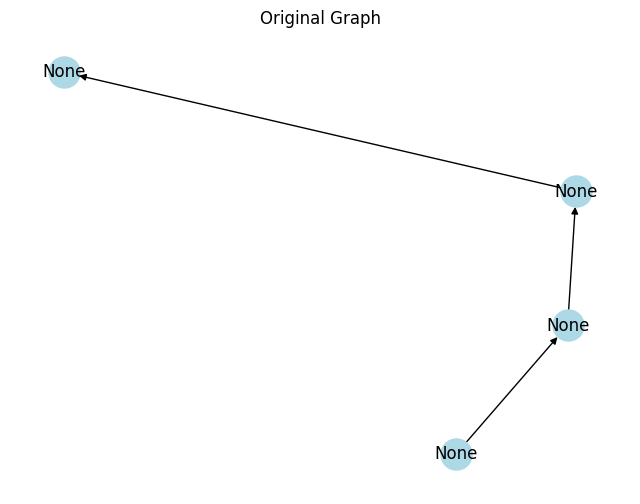

In [14]:
from matplotlib import pyplot as plt
visualize_graph(graph1, "Original Graph")

In [8]:
from itertools import permutations, product

def generate_permutations(groups):
    # For each group, generate all permutations
    permuted_groups = [list(permutations(group)) for group in groups]

    # Generate all combinations of permutations from each group
    output = []
    for permutation_product in product(*permuted_groups):
        output.append(''.join([''.join(permutation) for permutation in permutation_product]))

    return output

# Define your groups

groups = [['x1', 'x2'], ['y1', 'y2'], ['z1', 'z2']]  # Here, n=3 (number of groups) and m=2 (size of each group)

# Get all permutations
all_permutations = generate_permutations(groups)

# Print all permutations
counter = 0
for perm in all_permutations:
    print(perm)
    counter += 1
print("Total number of permutations: ", counter)


x1x2y1y2z1z2
x1x2y1y2z2z1
x1x2y2y1z1z2
x1x2y2y1z2z1
x2x1y1y2z1z2
x2x1y1y2z2z1
x2x1y2y1z1z2
x2x1y2y1z2z1
Total number of permutations:  8


In [7]:
from itertools import permutations, product

def generate_permutations(groups):
    # Generate all permutations of each group
    permuted_groups = [list(permutations(group)) for group in groups]

    # Create a list of dictionaries, each representing a permutation
    output = []
    for permutation_product in product(*permuted_groups):
        perm_dict = {}
        for original_group, permuted_group in zip(groups, permutation_product):
            perm_dict.update(dict(zip(original_group, permuted_group)))
        output.append(perm_dict)

    return output

# Define your variables
x1, x2 = "x1", "x2"
y1, y2 = "x3", "x4"
z1, z2 = "x5", "x6"

# Define your groups
groups = [[x1, x2], [y1, y2], [z1, z2]]

# Generate all permutations
all_permutations = generate_permutations(groups)

# Print all permutations
for perm in all_permutations:
    print(perm)

{'x1': 'x1', 'x2': 'x2', 'x3': 'x3', 'x4': 'x4', 'x5': 'x5', 'x6': 'x6'}
{'x1': 'x1', 'x2': 'x2', 'x3': 'x3', 'x4': 'x4', 'x5': 'x6', 'x6': 'x5'}
{'x1': 'x1', 'x2': 'x2', 'x3': 'x4', 'x4': 'x3', 'x5': 'x5', 'x6': 'x6'}
{'x1': 'x1', 'x2': 'x2', 'x3': 'x4', 'x4': 'x3', 'x5': 'x6', 'x6': 'x5'}
{'x1': 'x2', 'x2': 'x1', 'x3': 'x3', 'x4': 'x4', 'x5': 'x5', 'x6': 'x6'}
{'x1': 'x2', 'x2': 'x1', 'x3': 'x3', 'x4': 'x4', 'x5': 'x6', 'x6': 'x5'}
{'x1': 'x2', 'x2': 'x1', 'x3': 'x4', 'x4': 'x3', 'x5': 'x5', 'x6': 'x6'}
{'x1': 'x2', 'x2': 'x1', 'x3': 'x4', 'x4': 'x3', 'x5': 'x6', 'x6': 'x5'}


In [10]:
def generate_groups(n, m):
    # Generate the numbers from 0 to n*m
    numbers = list(range(n*m))

    # Split the numbers into groups
    groups = [numbers[i:i+m] for i in range(0, len(numbers), m)]

    return groups

# Example usage
groups = generate_groups(4, 3)
print(groups)

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]


In [12]:
from itertools import permutations, product

def generate_groups(n, m):
    # Generate the numbers from 0 to n*m
    numbers = list(range(n*m))

    # Split the numbers into groups
    groups = [numbers[i:i+m] for i in range(0, len(numbers), m)]

    return groups

def generate_permutations(n, m):
    # Generate the groups
    groups = generate_groups(n, m)

    # Generate all permutations of each group
    permuted_groups = [list(permutations(group)) for group in groups]

    # Create a list of dictionaries, each representing a permutation
    output = []
    for permutation_product in product(*permuted_groups):
        perm_dict = {}
        for original_group, permuted_group in zip(groups, permutation_product):
            perm_dict.update(dict(zip(original_group, permuted_group)))
        output.append(perm_dict)

    return output

# Define your parameters
n, m = 3, 2

# Generate all permutations
all_permutations = generate_permutations(n, m)

# # Print all permutations
# for perm in all_permutations:
#     print(perm)

print(all_permutations)

[{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 5, 5: 4}, {0: 0, 1: 1, 2: 3, 3: 2, 4: 4, 5: 5}, {0: 0, 1: 1, 2: 3, 3: 2, 4: 5, 5: 4}, {0: 1, 1: 0, 2: 2, 3: 3, 4: 4, 5: 5}, {0: 1, 1: 0, 2: 2, 3: 3, 4: 5, 5: 4}, {0: 1, 1: 0, 2: 3, 3: 2, 4: 4, 5: 5}, {0: 1, 1: 0, 2: 3, 3: 2, 4: 5, 5: 4}]
